## Final Project Submission

Please fill out:
* Student name: William Itotia
* Student pace: part time 
* Scheduled project review date/time: 
* Instructor name: Mwikali
* Blog post URL:

# PROJECT OBJECTIVE

Microsoft has seen a gap in the market that involves original content creation and wants to get
into the act. But they do not want to just jump into this blindly.

Which is why this project aims to explore what films are currently doing the best at box office, then translate these findings into actionable insights that the head of Microsoft's new studio can use to help decide what types of films to create.
To do this we will be using the following data sets provided from:
    
    1. Box Office Mojo.
    
    2. IMDB.
    
    3. Rotten Tomatoes.
    
    4. TheMovieDB.
    
    5. The Numbers.

# BUSINESS QUESTIONS

1. The question we're first addressing concerns which genre Microsoft should concentrate on. This entails examining the provided data to discern which genre performs best, guiding Microsoft on which genre can
lead to the highest capital gains.

2. The second question we're addressing is about the ideal movie length. This involves identifying trends in movie performance based on their duration.

3. Another question we're exploring is whether having a significant budget is advantageous and if it affects movie performance.

4. Lastly, we want to know who Microsoft's main studio competitors will be once they enter the film industry.



In [159]:
# Import python packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import os

%matplotlib inline

# DATA UNDERSTANDING

In this section we will be reading the recommend datasets to understand what we are working with
and how it can be manipulated, to yield meaningful data for decision making.

In [160]:
# Establish connection with the IMDB database
db_file = "C:/Users/willi/OneDrive/Documents/GitHub/dsc-phase-1-project-v2-4/zippedData/im.db/im.db"

conn = sqlite3.connect(db_file)

Below is an overview of how the IMDB Database looks
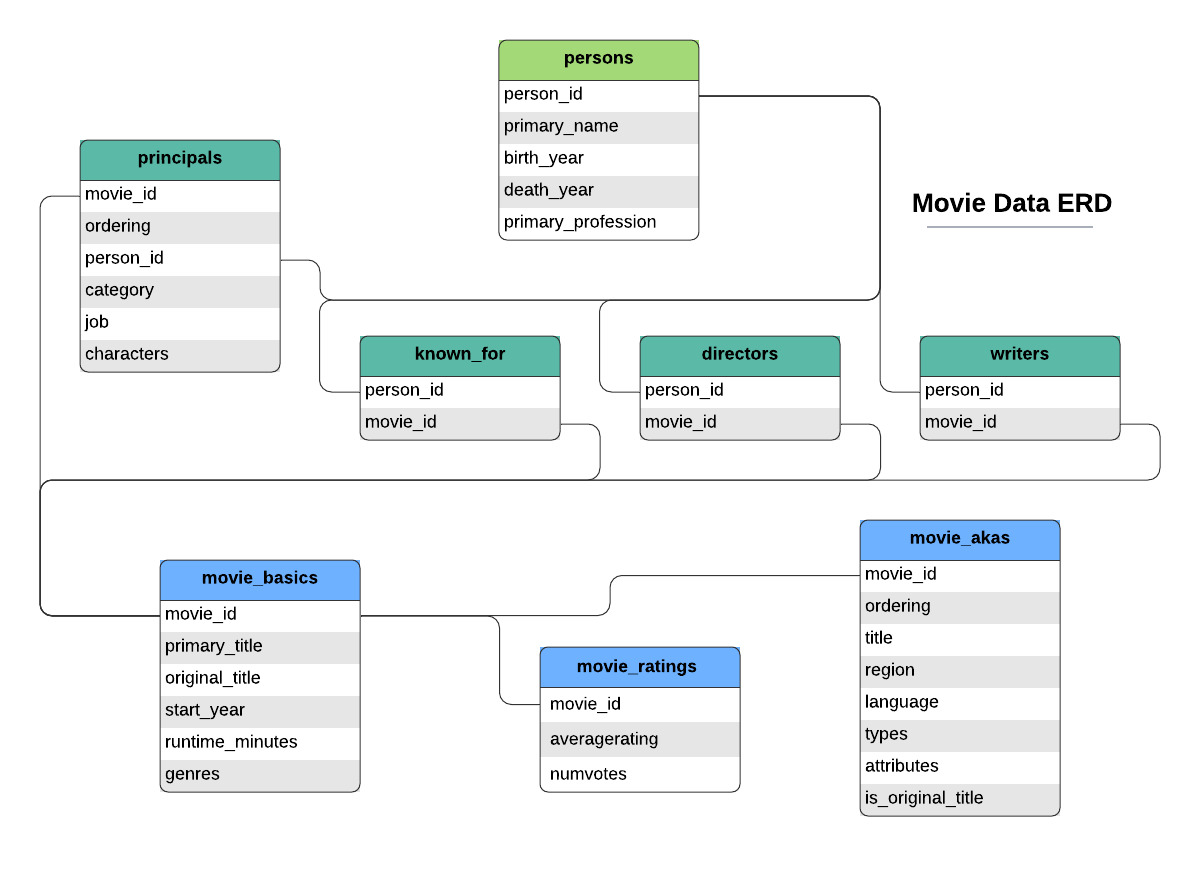

Use the Pandas library to read the contents of one of the CSV datasets provided named 'bom.movie_gross.csv.
The same will be done for the other datasets provided. In order to be able to see all the data that we 
are working with.

In [161]:

# Read the CSV file into a DataFrame
Bom_movie_gross = pd.read_csv("C:\\Users\\willi\\OneDrive\\Documents\\GitHub\\dsc-phase-1-project-v2-4\\zippedData\\bom.movie_gross.csv\\bom.movie_gross.csv")

print(Bom_movie_gross)


                                            title      studio  domestic_gross  \
0                                     Toy Story 3          BV     415000000.0   
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
...                                           ...         ...             ...   
3382                                    The Quake       Magn.          6200.0   
3383                  Edward II (2018 re-release)          FM          4800.0   
3384                                     El Pacto        Sony          2500.0   
3385                                     The Swan  Synergetic          2400.0   
3386                            An Actor Prepares       Grav.          1700.0   

     foreign_gross  year  


In [162]:
Bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


Now that we have seen all the data we are working with it is time to begin analyzing the data 
in the IMDB database using SQL

In [163]:
#Read the tn.movie_database DataFrame
tn_movie_budgets = pd.read_csv(r"C:\Users\willi\OneDrive\Documents\GitHub\dsc-phase-1-project-v2-4\zippedData\tn.movie_budgets.csv\tn.movie_budgets.csv")

print(tn_movie_budgets)

      id  release_date                                        movie  \
0      1  Dec 18, 2009                                       Avatar   
1      2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2      3   Jun 7, 2019                                 Dark Phoenix   
3      4   May 1, 2015                      Avengers: Age of Ultron   
4      5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   
...   ..           ...                                          ...   
5777  78  Dec 31, 2018                                       Red 11   
5778  79   Apr 2, 1999                                    Following   
5779  80  Jul 13, 2005                Return to the Land of Wonders   
5780  81  Sep 29, 2015                         A Plague So Pleasant   
5781  82   Aug 5, 2005                            My Date With Drew   

     production_budget domestic_gross worldwide_gross  
0         $425,000,000   $760,507,625  $2,776,345,279  
1         $410,600,000   $241,063,8

In [164]:
tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [165]:
#Would like to understand the structure of our IMDB database in order to grasp the 
#organization of its tables.
schema_df5 = pd.read_sql("""

SELECT *
    FROM sqlite_master

""", conn)

schema_df5

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


The morst important tables for us in this database are movie_basics and movie_ratings
so lets take a deeper look at them

In [166]:
movie_basics = pd.read_sql("""

SELECT *
FROM movie_basics

""", conn)
print(movie_basics)


         movie_id                                primary_title  \
0       tt0063540                                    Sunghursh   
1       tt0066787              One Day Before the Rainy Season   
2       tt0069049                   The Other Side of the Wind   
3       tt0069204                              Sabse Bada Sukh   
4       tt0100275                     The Wandering Soap Opera   
...           ...                                          ...   
146139  tt9916538                          Kuambil Lagi Hatiku   
146140  tt9916622  Rodolpho Teóphilo - O Legado de um Pioneiro   
146141  tt9916706                              Dankyavar Danka   
146142  tt9916730                                       6 Gunn   
146143  tt9916754               Chico Albuquerque - Revelações   

                                     original_title  start_year  \
0                                         Sunghursh        2013   
1                                   Ashad Ka Ek Din        2019   
2     

In [167]:
movie_ratings = pd.read_sql("""

SELECT *
FROM movie_ratings

""", conn)
print(movie_ratings)

         movie_id  averagerating  numvotes
0      tt10356526            8.3        31
1      tt10384606            8.9       559
2       tt1042974            6.4        20
3       tt1043726            4.2     50352
4       tt1060240            6.5        21
...           ...            ...       ...
73851   tt9805820            8.1        25
73852   tt9844256            7.5        24
73853   tt9851050            4.7        14
73854   tt9886934            7.0         5
73855   tt9894098            6.3       128

[73856 rows x 3 columns]


After seeing the data from these two tables the next step is to merge the averagerating column to 
the table movie_basics. This is because it offers us important information on how the movies are being
perceived

In [168]:

#Merging movie_basics to movie_ratings
merged_imdb = movie_basics.merge(movie_ratings, on='movie_id', how='inner')
print(merged_imdb)


        movie_id                    primary_title              original_title  \
0      tt0063540                        Sunghursh                   Sunghursh   
1      tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2      tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3      tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4      tt0100275         The Wandering Soap Opera       La Telenovela Errante   
...          ...                              ...                         ...   
73851  tt9913084                 Diabolik sono io            Diabolik sono io   
73852  tt9914286                Sokagin Çocuklari           Sokagin Çocuklari   
73853  tt9914642                        Albatross                   Albatross   
73854  tt9914942       La vida sense la Sara Amat  La vida sense la Sara Amat   
73855  tt9916160                       Drømmeland                  Drømmeland   

       start_year  runtime_

In [169]:
# Print information about the merged DataFrame
print(merged_imdb.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB
None


# DATA CLEANING

Before Data Analysis is done we have to ensure that all the data we are working with is accurate, has no duplicates or any missing data. 


In [170]:
#Cleaning the IM.DB Database
# Handle missing values
merged_imdb['runtime_minutes'].fillna(merged_imdb['runtime_minutes'].median(), inplace=True)
merged_imdb['genres'].fillna('Unknown', inplace=True)

# Remove duplicate records
merged_imdb.drop_duplicates(inplace=True)

# Convert data types
merged_imdb['start_year'] = pd.to_datetime(merged_imdb['start_year'], format='%Y')  
merged_imdb['numvotes'] = merged_imdb['numvotes'].astype('int64')  



# Display info after cleaning
merged_imdb


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013-01-01,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019-01-01,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018-01-01,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018-01-01,91.0,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017-01-01,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019-01-01,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019-01-01,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017-01-01,91.0,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019-01-01,91.0,Unknown,6.6,5


In [171]:
#Cleaning the bom.movie_gross.csv
# Drop rows with missing values in the 'studio' column
Bom_movie_gross.dropna(subset=['studio'], inplace=True)

# Fill missing values in 'domestic_gross' with the median
Bom_movie_gross['domestic_gross'].fillna(Bom_movie_gross['domestic_gross'].median(), inplace=True)

# Convert 'foreign_gross' to numeric and fill missing values with 0
Bom_movie_gross['foreign_gross'] = pd.to_numeric(Bom_movie_gross['foreign_gross'], errors='coerce').fillna(0)



In [172]:
Bom_movie_gross.to_csv('cleaned_bom_movie_gross.csv', index=False)
cleaned_bom_movie_gross = pd.read_csv('cleaned_bom_movie_gross.csv')
cleaned_bom_movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3377,The Quake,Magn.,6200.0,0.0,2018
3378,Edward II (2018 re-release),FM,4800.0,0.0,2018
3379,El Pacto,Sony,2500.0,0.0,2018
3380,The Swan,Synergetic,2400.0,0.0,2018


In [173]:
# Convert columns to appropriate data types
tn_movie_budgets['release_date'] = pd.to_datetime(tn_movie_budgets['release_date'])
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].str.replace('$', '').str.replace(',', '').astype(float)
tn_movie_budgets['domestic_gross'] = tn_movie_budgets['domestic_gross'].str.replace('$', '').str.replace(',', '').astype(float)
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(float)


# Remove duplicates
tn_movie_budgets.drop_duplicates(inplace=True)


In [174]:

tn_movie_budgets.to_csv('cleaned_tn_movie_budgets.csv', index=False)
cleaned_tn_movie_budgets = pd.read_csv('cleaned_tn_movie_budgets.csv')
cleaned_tn_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000.0,0.0,0.000000e+00
5778,79,1999-04-02,Following,6000.0,48482.0,2.404950e+05
5779,80,2005-07-13,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03
5780,81,2015-09-29,A Plague So Pleasant,1400.0,0.0,0.000000e+00


# DATA ANALYSIS

Now that we have cleaned all the data, it is time to do Data Analysis on it. The first thing to do 
is merge the tables in order to be able to carry out an analysis with the required and relevant data.

In [175]:

# Merge the 'studio' column from cleaned_bom_movie_gross to cleaned_tn_movie_budgets
merged_movie_data = cleaned_tn_movie_budgets.merge(cleaned_bom_movie_gross[['title', 'studio']], left_on='movie', right_on='title', how='left')

# Drop the 'title' column as it's redundant
merged_movie_data.drop('title', axis=1, inplace=True)

merged_movie_data

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,studio
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,NaN
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,BV
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,NaN
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,BV
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,NaN
...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000.0,0.0,0.000000e+00,NaN
5778,79,1999-04-02,Following,6000.0,48482.0,2.404950e+05,NaN
5779,80,2005-07-13,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,NaN
5780,81,2015-09-29,A Plague So Pleasant,1400.0,0.0,0.000000e+00,NaN


In [176]:
# Drop rows with missing values in the 'studio' column
merged_movie_data_cleaned = merged_movie_data.dropna(subset=['studio'])

# Convert the 'release_date' column to datetime format
merged_movie_data_cleaned['release_date'] = pd.to_datetime(merged_movie_data_cleaned['release_date'])


# Reset index
merged_movie_data_cleaned.reset_index(drop=True, inplace=True)

# Display the cleaned DataFrame
merged_movie_data_cleaned

C:\Users\willi\AppData\Local\Temp\ipykernel_22876\2341243634.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_movie_data_cleaned['release_date'] = pd.to_datetime(merged_movie_data_cleaned['release_date'])


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,studio
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,BV
1,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,BV
2,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,BV
3,9,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,WB
4,10,2015-11-06,Spectre,300000000.0,200074175.0,8.796209e+08,Sony
...,...,...,...,...,...,...,...
1241,68,2012-04-27,Sound of My Voice,135000.0,408015.0,4.294480e+05,FoxS
1242,73,2012-06-15,Your Sister's Sister,120000.0,1597486.0,3.090593e+06,IFC
1243,80,2015-07-10,The Gallows,100000.0,22764410.0,4.165647e+07,WB (NL)
1244,86,2017-07-07,A Ghost Story,100000.0,1594798.0,2.769782e+06,A24


In [182]:
# Merge the 'genres' and 'runtime_minutes' columns from merged_imdb with merged_movie_data_cleaned
merged_movie_data_cleaned = pd.merge(merged_movie_data_cleaned, merged_imdb[['primary_title', 'genres', 'runtime_minutes']], left_on='movie', right_on='primary_title', how='left')

# Drop the 'primary_title' column as it's no longer needed
merged_movie_data_cleaned.drop('primary_title', axis=1, inplace=True)

# Display the updated DataFrame
# merged_movie_data_cleaned


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,studio,genres_x,runtime_minutes_x,genres_y,runtime_minutes_y
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,BV,"Action,Adventure,Fantasy",136.0,"Action,Adventure,Fantasy",136.0
1,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,BV,"Action,Adventure,Sci-Fi",141.0,"Action,Adventure,Sci-Fi",141.0
2,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,BV,"Action,Adventure,Sci-Fi",149.0,"Action,Adventure,Sci-Fi",149.0
3,9,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,WB,"Action,Adventure,Fantasy",120.0,"Action,Adventure,Fantasy",120.0
4,10,2015-11-06,Spectre,300000000.0,200074175.0,8.796209e+08,Sony,"Action,Adventure,Thriller",148.0,"Action,Adventure,Thriller",148.0
...,...,...,...,...,...,...,...,...,...,...,...
2268,68,2012-04-27,Sound of My Voice,135000.0,408015.0,4.294480e+05,FoxS,"Drama,Mystery,Sci-Fi",85.0,"Drama,Mystery,Sci-Fi",85.0
2269,73,2012-06-15,Your Sister's Sister,120000.0,1597486.0,3.090593e+06,IFC,"Comedy,Drama",90.0,"Comedy,Drama",90.0
2270,80,2015-07-10,The Gallows,100000.0,22764410.0,4.165647e+07,WB (NL),"Horror,Mystery,Thriller",81.0,"Horror,Mystery,Thriller",81.0
2271,86,2017-07-07,A Ghost Story,100000.0,1594798.0,2.769782e+06,A24,"Drama,Fantasy,Romance",92.0,"Drama,Fantasy,Romance",92.0


In [183]:
# Drop the duplicate columns
merged_movie_data_cleaned.drop(['genres_y', 'runtime_minutes_y'], axis=1, inplace=True)
merged_movie_data_cleaned

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,studio,genres_x,runtime_minutes_x
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,BV,"Action,Adventure,Fantasy",136.0
1,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,BV,"Action,Adventure,Sci-Fi",141.0
2,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,BV,"Action,Adventure,Sci-Fi",149.0
3,9,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,WB,"Action,Adventure,Fantasy",120.0
4,10,2015-11-06,Spectre,300000000.0,200074175.0,8.796209e+08,Sony,"Action,Adventure,Thriller",148.0
...,...,...,...,...,...,...,...,...,...
2268,68,2012-04-27,Sound of My Voice,135000.0,408015.0,4.294480e+05,FoxS,"Drama,Mystery,Sci-Fi",85.0
2269,73,2012-06-15,Your Sister's Sister,120000.0,1597486.0,3.090593e+06,IFC,"Comedy,Drama",90.0
2270,80,2015-07-10,The Gallows,100000.0,22764410.0,4.165647e+07,WB (NL),"Horror,Mystery,Thriller",81.0
2271,86,2017-07-07,A Ghost Story,100000.0,1594798.0,2.769782e+06,A24,"Drama,Fantasy,Romance",92.0


ANSWERING BUSINESS QUESTIONS

The above table merged_movie_data_cleaned is what we will be using to answer our business questions as it
has all the data we will require to answer our business questions.


In [188]:
#What genre should Microsoft focus on

#Display only worldwide gross and genre, display worldwide gross in descending order to find the best performing runtime minutes
subset_genre_performance = merged_movie_data_cleaned[['worldwide_gross', 'genres_x']].sort_values(by='worldwide_gross', ascending=False)
subset_genre_performance.head(15)


,worldwide_gross,genres_x
2,2.048134e+09,"Action,Adventure,Sci-Fi"
21,1.648855e+09,"Action,Adventure,Sci-Fi"
54,1.518723e+09,"Action,Crime,Thriller"
1,1.403014e+09,"Action,Adventure,Sci-Fi"
39,1.348258e+09,"Action,Adventure,Sci-Fi"
100,1.305773e+09,"Action,Adventure,Sci-Fi"
137,1.272470e+09,"Adventure,Drama,Sport"
143,1.272470e+09,"Adventure,Animation,Comedy"
142,1.272470e+09,"Fantasy,Romance"
141,1.272470e+09,"Fantasy,Romance"


Now we need to visualize this data in order to be able to see which genre perfoms the best in terms of 
worldwide gross.


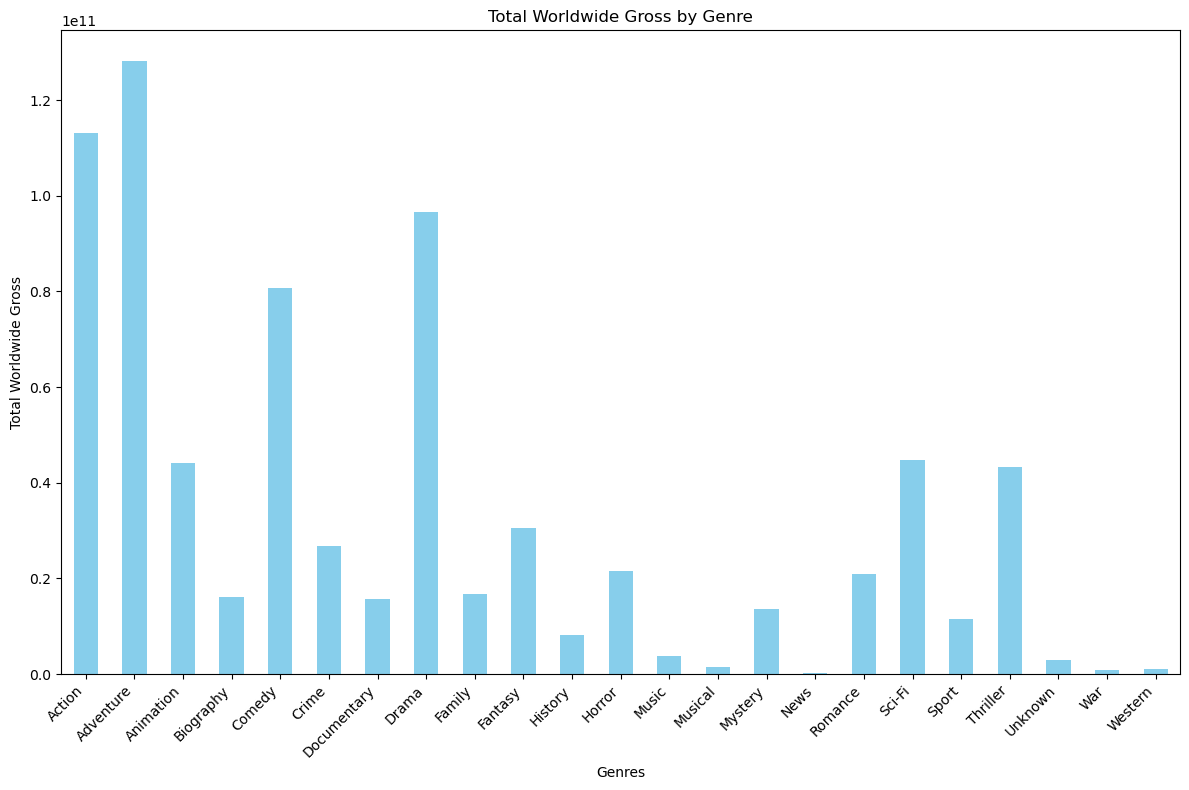

In [202]:
#To visualize this data we need to:
# Step 1: Splitting genres into individual rows
subset_genre_performance['genres_x'] = subset_genre_performance['genres_x'].str.split(',')

# Explode the DataFrame so that each genre gets its own row
subset_genre_performance_exploded = subset_genre_performance.explode('genres_x')

# Step 2: Grouping by genre and calculating the total worldwide gross
genre_total_gross = subset_genre_performance_exploded.groupby('genres_x')['worldwide_gross'].sum()

# Step 3: Plotting the grouped bar chart
plt.figure(figsize=(12, 8))
genre_total_gross.plot(kind='bar', color='skyblue')
plt.xlabel('Genres')
plt.ylabel('Total Worldwide Gross')
plt.title('Total Worldwide Gross by Genre')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [205]:
#How long should movies be?
#Display only worldwide gross and runtime minutes, display worldwide gross in descending order to find the best runtime minutes
subset_runtime_minutes = merged_movie_data_cleaned.loc[:, ['worldwide_gross', 'runtime_minutes_x']]
subset_runtime_minutes.head(15)


,worldwide_gross,runtime_minutes_x
2,2.048134e+09,149.0
21,1.648855e+09,124.0
54,1.518723e+09,137.0
1,1.403014e+09,141.0
39,1.348258e+09,134.0
100,1.305773e+09,128.0
140,1.272470e+09,92.0
137,1.272470e+09,93.0
143,1.272470e+09,102.0
142,1.272470e+09,92.0


Now we need to analyse this data and visualize to see whether there is any correlation between runtime 
minutes and worldwide gross.

Correlation coefficient: 0.12351083671720954


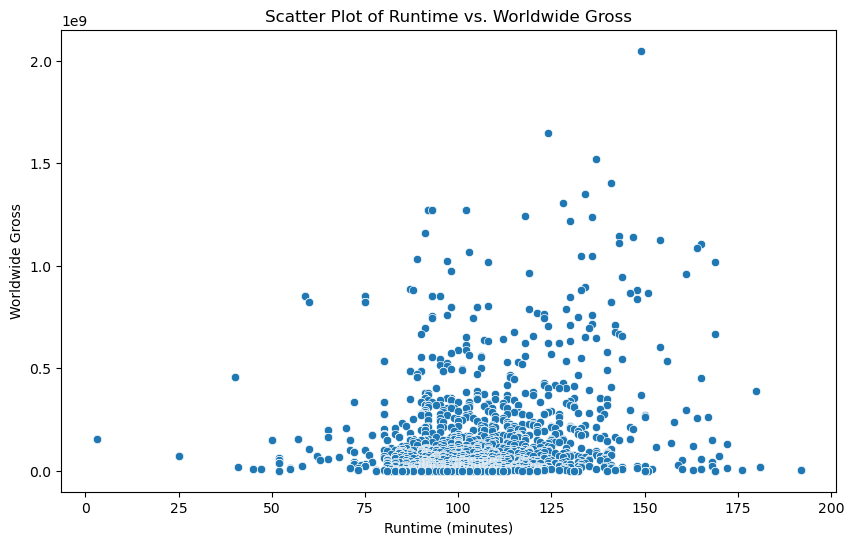

In [206]:

# Calculate correlation coefficient
correlation = subset_runtime_minutes['runtime_minutes_x'].corr(subset_runtime_minutes['worldwide_gross'])
print("Correlation coefficient:", correlation)

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=subset_runtime_minutes, x='runtime_minutes_x', y='worldwide_gross')
plt.title('Scatter Plot of Runtime vs. Worldwide Gross')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Worldwide Gross')
plt.show()


In [215]:
#Is having a huge budget beneficial?
#Display only worldwide gross and production budget, display worldwide gross in descending order to find the best performing production budget
subset_budget = merged_movie_data_cleaned[['worldwide_gross', 'production_budget']]

# Displaying the subset of data
subset_budget


,worldwide_gross,production_budget
2,2.048134e+09,300000000.0
21,1.648855e+09,215000000.0
54,1.518723e+09,190000000.0
1,1.403014e+09,330600000.0
39,1.348258e+09,200000000.0
...,...,...
2123,0.000000e+00,2300000.0
2124,0.000000e+00,2300000.0
2125,0.000000e+00,2300000.0
2128,0.000000e+00,2300000.0


Now that we have this data we can analyse it and see whether or not there is a correlation between having
a high budget and the performance of the movie.

Correlation coefficient: 0.75930039441705


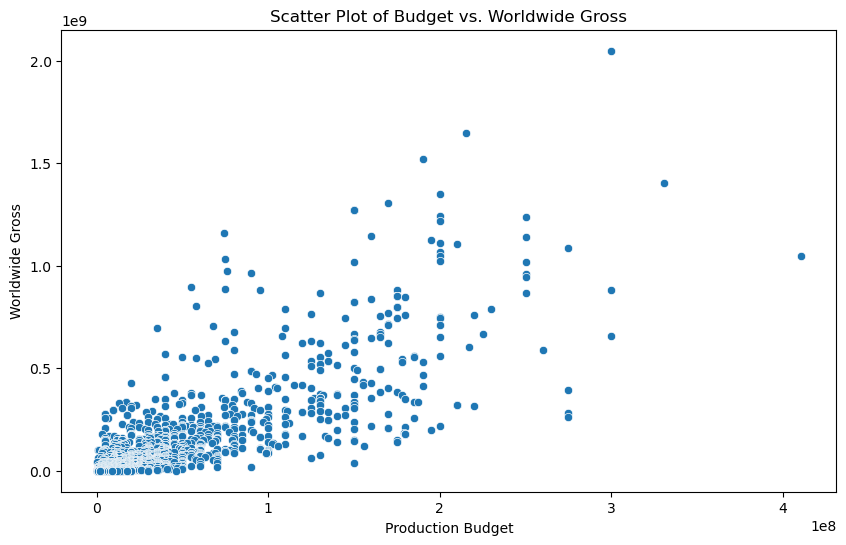

In [216]:
# Calculate correlation coefficient
correlation_budget = subset_budget['production_budget'].corr(subset_budget['worldwide_gross'])
print("Correlation coefficient:", correlation_budget)

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=subset_budget, x='production_budget', y='worldwide_gross')
plt.title('Scatter Plot of Budget vs. Worldwide Gross')
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')
plt.show()

In [217]:
#Which studio will be Microsoft's biggest competitor?
##Display only worldwide gross and studio, display worldwide gross in descending order to find the best performing studios
subset_studio = merged_movie_data_cleaned[['worldwide_gross', 'studio']]
subset_studio

,worldwide_gross,studio
2,2.048134e+09,BV
21,1.648855e+09,Uni.
54,1.518723e+09,Uni.
1,1.403014e+09,BV
39,1.348258e+09,BV
...,...,...
2123,0.000000e+00,BG
2124,0.000000e+00,BG
2125,0.000000e+00,BG
2128,0.000000e+00,BG


In [218]:
# To find the best performing studio, we want to see which studio appears the most frequent times in the top 30
top_30_studios = subset_studio.head(30)  # Subset the top 30 rows
studio_counts = top_30_studios['studio'].value_counts()  # Count the frequency of each studio
best_performing_studio = studio_counts.idxmax()  # Extract the studio with the highest frequency

print("The best performing studio in the top 30 rows is:", best_performing_studio)


The best performing studio in the top 30 rows is: BV
